# Content list
1. Import libraries
2. Import data
3. Visualizations

# 01. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [2]:
# Create path
path = r'C:\Users\adrig\OneDrive\Documentos\CARRIERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 4\Ex_4.2_Python\03-2025 Instacart Basket Analysis'

In [3]:
# Import data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_new_var_customer_flags.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,days_last_order_median,frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regular days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Mid-range product,Regularly busy,Regular days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low-range product,Regularly busy,Regular days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low-range product,Regularly busy,Regular days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low-range product,Regularly busy,Regular days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 03. Visualizations

## 03.1 Bar Chart

<Axes: xlabel='orders_day_of_week'>

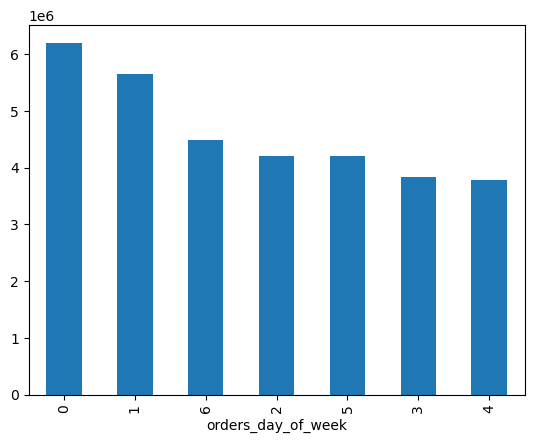

In [5]:
# Creating a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

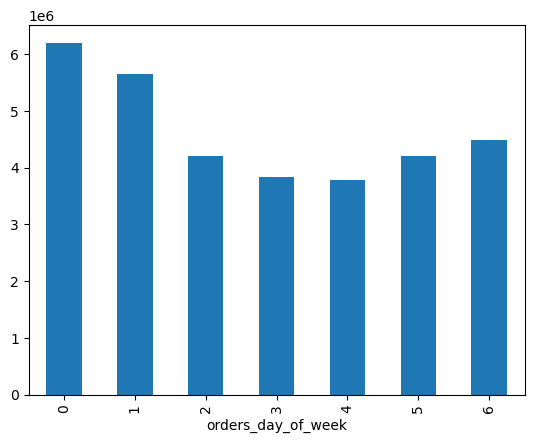

In [6]:
# Adding sort_index to sort the bars according to the index order (rather than largest to smallest)
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Printing frequencies
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [8]:
# Using sort_index also for printing frequencies
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

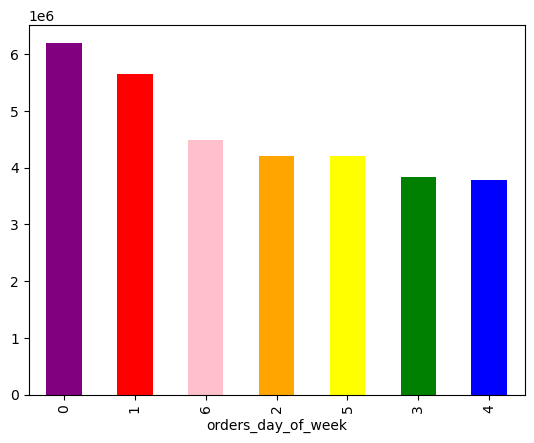

In [9]:
# Changig color to bars
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## 03.2 Histogram

<Axes: ylabel='Frequency'>

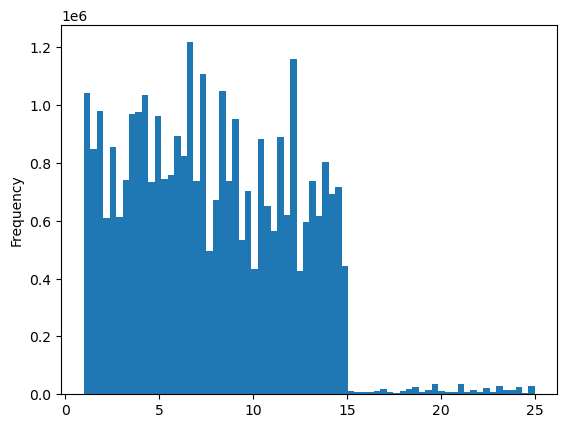

In [11]:
# Create histogram (continuous variables) of prices column 
ords_prods_merge['prices'].plot.hist(bins = 70)

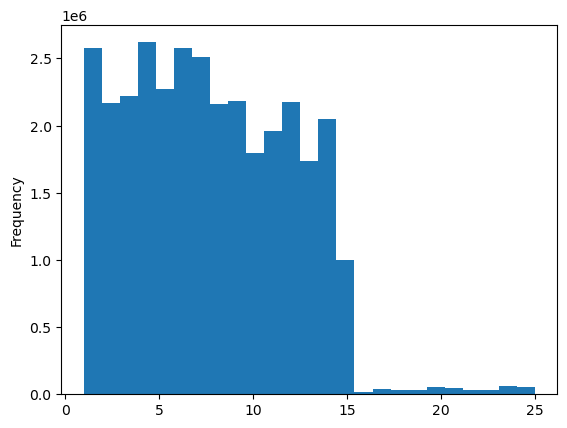

In [12]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

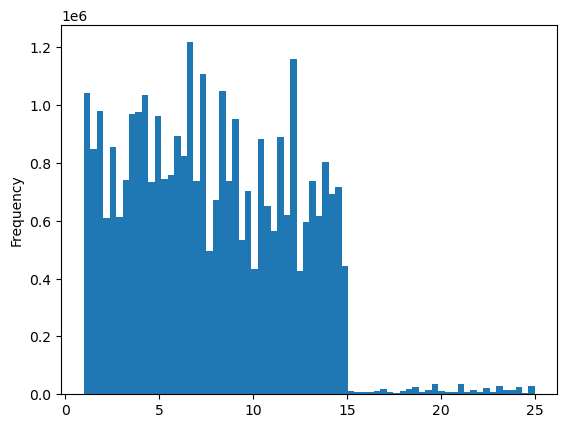

In [13]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [14]:
# Export histograms
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_dow.png'))

In [15]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_orders_dow.png'))

## 03.3 Line Chart

0.3.3.1 Sampling data

In [16]:
# Create a sample 70/30
np.random.seed(4) # reproducible pattern
dev = np.random.rand(len(ords_prods_merge)) <= 0.7 # new list called dev (to store the boolean values based on whether it's less or equal to 0.7)

In [17]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
# Create a list of random 10 random numbers between 0 and 1
np.random.rand(10) # In the case above the amount of numbers is defined by the values in 'ords_prods_merge'

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [19]:
# Create both samples
big = ords_prods_merge[dev] # 70% of the sample
small = ords_prods_merge[~dev] # ~ negates the argument, 30% of the sample

In [20]:
# checking the results
len(ords_prods_merge)

32404859

In [21]:
len(big) + len(small)

32404859

In [22]:
df_2 = small[['orders_day_of_week', 'prices']]

In [23]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


0.3.3.2 Line Chart

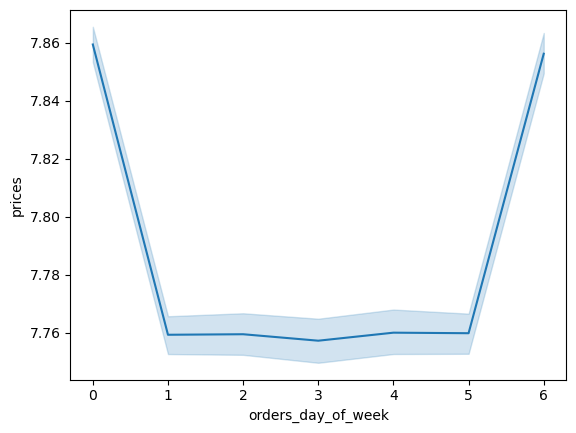

In [24]:
# Create a line chart using a sample
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [25]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow_prices.png'))